In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sp500_variables import sp500_dict
from utils import now_date

In [2]:
sp500 = pd.read_html(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [3]:
sp500 = sp500[['Symbol','Security','GICS Sector']]

In [4]:
listdf = ['Symbol', 'Return']
df = pd.read_csv('./out/best_companies-29_06_2022.csv', names=listdf).drop(0,axis=0)

In [5]:
df_companies = pd.merge(df,sp500,left_on='Symbol',right_on='Symbol')
df_companies['GICS Sector'].value_counts()

Information Technology    15
Consumer Discretionary     8
Health Care                6
Industrials                4
Materials                  2
Utilities                  1
Consumer Staples           1
Communication Services     1
Energy                     1
Real Estate                1
Name: GICS Sector, dtype: int64

In [38]:
def year_volatilidad(df):

    retorno = df['Adj Close'].pct_change()
    daily_std = np.std(retorno)
    annual_std = daily_std*np.sqrt(252)
    return annual_std
    
def sorter(data, bool):
    sort = {}
    sort_keys = sorted(data, key=data.get, reverse=bool)

    for w in sort_keys:
        sort[w] = data[w]
    return sort

def iter_year_volatilidad(data):
    for key in data.keys():
        data[key] = year_volatilidad(data[key])

    sorted_vol = pd.Series(sorter(data, False))
    return sorted_vol

In [40]:
data_dict = sp500_dict(df_companies['Symbol'])

Cargando MRNA from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando CEG from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando ENPH from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando CARR from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando TSLA from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando SEDG from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando CZR from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando PAYC from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando MNST from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando NFLX from yahoo finance
[*********************100%***********************] 

In [41]:
vol = iter_year_volatilidad(data_dict)

In [47]:
vol.values

array([0.28581977, 0.34053459, 0.34565002, 0.35426696, 0.3593561 ,
       0.37443457, 0.38931671, 0.40813421, 0.4112787 , 0.41160521,
       0.41340114, 0.41710266, 0.42215882, 0.42788894, 0.43435711,
       0.43515122, 0.43814963, 0.45067116, 0.45825232, 0.46504786,
       0.46512325, 0.4663719 , 0.48150752, 0.50408942, 0.51388854,
       0.520041  , 0.52651646, 0.53260505, 0.56191941, 0.56982699,
       0.57246318, 0.58911631, 0.60119007, 0.60306397, 0.61019598,
       0.61809474, 0.61969824, 0.64298224, 0.81938035, 0.84020425])

In [48]:
voll = pd.DataFrame()
voll['Symbol'] = vol.index
voll['vol'] = vol.values

In [49]:
voll

,Symbol,vol
0,CDW,0.285820
1,TDG,0.340535
2,MA,0.345650
3,AVGO,0.354267
4,DPZ,0.359356
5,TSCO,0.374435
6,CTVA,0.389317
7,GNRC,0.408134
8,AAPL,0.411279
9,FTNT,0.411605


In [55]:
df_companie = pd.merge(df_companies,voll,left_on='Symbol',right_on='Symbol')
portafolio = df_companie.sort_values(by=['vol']).iloc[:9]

In [57]:
portafolio.to_csv(f'out/portafolio_{now_date()}.csv')

In [71]:
portafolio

,Symbol,Return,Security,GICS Sector,vol
38,CDW,0.336525,CDW,Information Technology,0.285820
32,TDG,0.347394,TransDigm Group,Industrials,0.340535
22,MA,0.388463,Mastercard,Information Technology,0.345650
15,AVGO,0.419183,Broadcom Inc.,Information Technology,0.354267
36,DPZ,0.341449,Domino's,Consumer Discretionary,0.359356
28,TSCO,0.365018,Tractor Supply,Consumer Discretionary,0.374435
35,CTVA,0.342802,Corteva,Materials,0.389317
18,GNRC,0.410027,Generac,Industrials,0.408134
27,AAPL,0.370447,Apple Inc.,Information Technology,0.411279


## Optimizacion 

In [59]:
portafolio_dict = sp500_dict(portafolio['Symbol'])

Cargando CDW from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando TDG from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando MA from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando AVGO from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando DPZ from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando TSCO from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando CTVA from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando GNRC from yahoo finance
[*********************100%***********************]  1 of 1 completed
Cargando AAPL from yahoo finance
[*********************100%***********************]  1 of 1 completed
 _______________ 
< 9 descargados > 
 --------------- 
        \   ^__^ 
         \  (o

In [73]:
portafolio_dict['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.94,1.00,0.91,1.00,0.85,535796800
2000-01-04,0.97,0.99,0.90,0.92,0.78,512377600
2000-01-05,0.93,0.99,0.92,0.93,0.79,778321600
2000-01-06,0.95,0.96,0.85,0.85,0.73,767972800
2000-01-07,0.86,0.90,0.85,0.89,0.76,460734400
...,...,...,...,...,...,...
2022-06-23,136.82,138.59,135.63,138.27,138.27,72433800
2022-06-24,139.90,141.91,139.77,141.66,141.66,89047400
2022-06-27,142.70,143.49,140.97,141.66,141.66,70207900


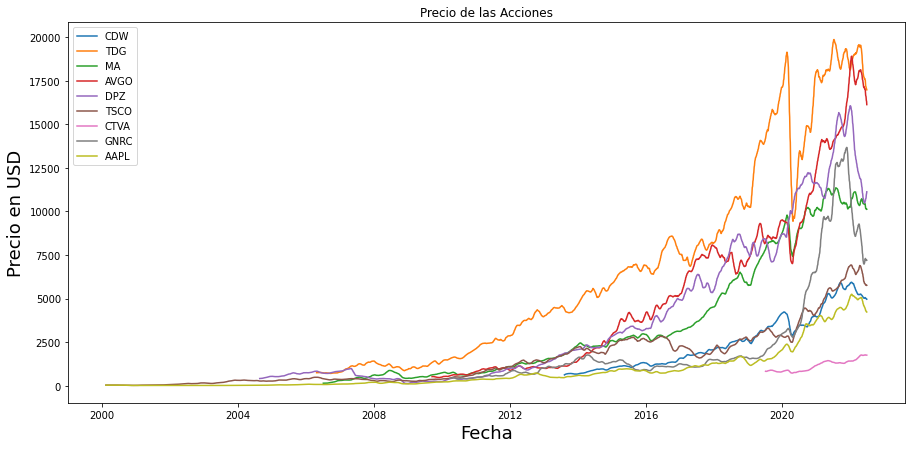

In [91]:
plt.figure(figsize=(15,7)) 
for key in portafolio_dict.keys():
    
    plt.plot( portafolio_dict[key]['Close'].rolling(30).sum(),  label=key)
    plt.legend()
    
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)

plt.savefig(f'portafolio-{now_date()}.png', dpi=300, bbox_inches='tight')
plt.show()